# Sprint 8 - Proyecto

## Análisis exploratorio de datos (Python)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los archivos CSV
df_companies = pd.read_csv("..\data\moved_project_sql_result_01.csv")
df_neighborhoods = pd.read_csv("..\data\moved_project_sql_result_04.csv")
df_loop_ohare = pd.read_csv("..\data\moved_project_sql_result_07.csv")

In [2]:
# Verificar estructura
print(df_companies.info())
print(df_neighborhoods.info())
print(df_loop_ohare.info())

# Ver los primeros registros
print(df_companies.head())
print(df_neighborhoods.head())
print(df_loop_ohare.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   d

In [3]:
# Conversión de tipos
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])
df_companies['trips_amount'] = pd.to_numeric(df_companies['trips_amount'], errors='coerce')
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')

## Top 10 de barrios

In [4]:
top10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## Gráfico: Empresas de taxi vs número de viajes

C:\Users\laura\AppData\Local\Temp\ipykernel_25380\148745684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_companies.sort_values('trips_amount', ascending=False),


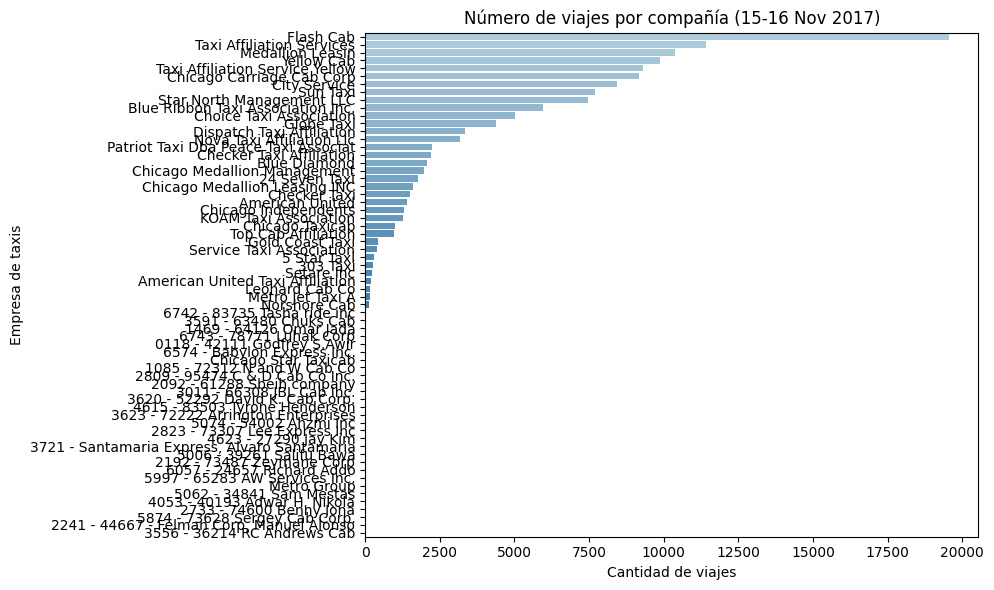

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_companies.sort_values('trips_amount', ascending=False), 
            x='trips_amount', y='company_name', palette='Blues_d')
plt.title('Número de viajes por compañía (15-16 Nov 2017)')
plt.xlabel('Cantidad de viajes')
plt.ylabel('Empresa de taxis')
plt.tight_layout()
plt.show()

C:\Users\laura\AppData\Local\Temp\ipykernel_25380\2035677125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_companies,


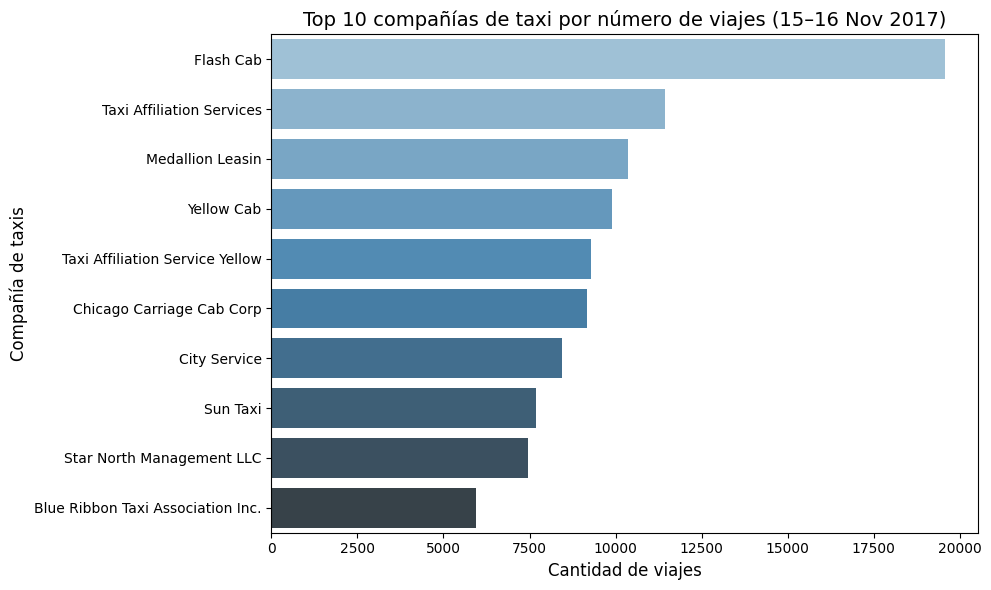

In [6]:
# Filtrar top 10 compañías por número de viajes
top10_companies = df_companies.sort_values('trips_amount', ascending=False).head(10)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_companies, 
            x='trips_amount', 
            y='company_name', 
            palette='Blues_d')

plt.title('Top 10 compañías de taxi por número de viajes (15–16 Nov 2017)', fontsize=14)
plt.xlabel('Cantidad de viajes', fontsize=12)
plt.ylabel('Compañía de taxis', fontsize=12)
plt.tight_layout()
plt.show()

Atendiendo a las observaciones, se añadió una visualización específica que muestra únicamente el top 10 de las compañías de taxi con mayor número de viajes los días 15 y 16 de noviembre de 2017.
Esta gráfica permite enfocar la atención en las empresas más relevantes del mercado, facilitando la toma de decisiones estratégicas para Zuber en función de sus competidores principales.

## Gráfico: Top 10 barrios por finalizaciones

C:\Users\laura\AppData\Local\Temp\ipykernel_25380\2938910667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_neighborhoods,


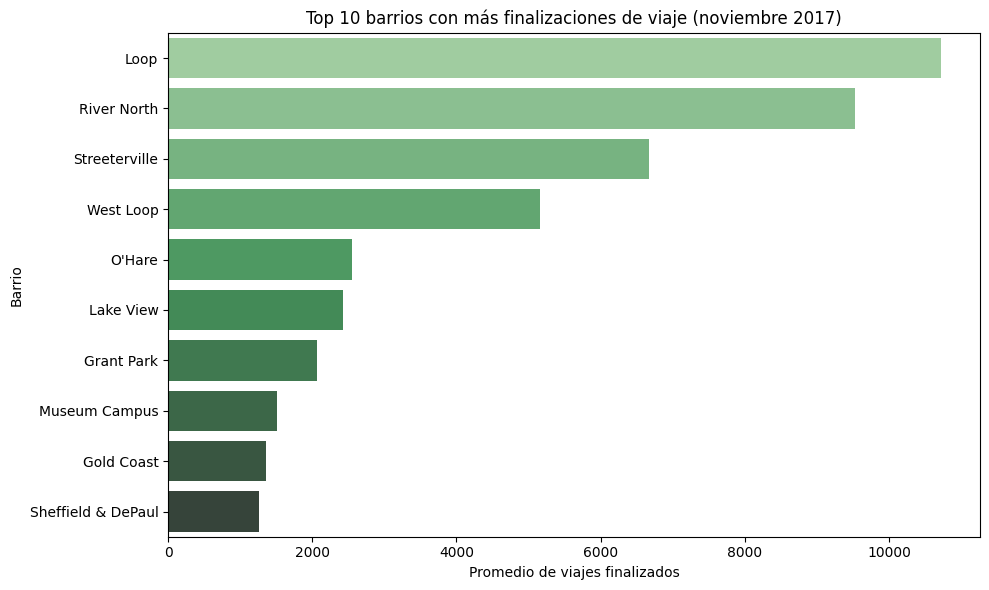

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_neighborhoods, 
            x='average_trips', y='dropoff_location_name', palette='Greens_d')
plt.title('Top 10 barrios con más finalizaciones de viaje (noviembre 2017)')
plt.xlabel('Promedio de viajes finalizados')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

## Conclusiones gráficas

Empresas de taxi:
Algunas compañías dominan el mercado, con significativamente más viajes que otras.
Esto podría ser resultado de flotas más grandes, acuerdos comerciales o posicionamiento de marca.
Barrios con más finalizaciones:
Barrios céntricos y comerciales tienden a tener más viajes que terminan allí.
Estos datos podrían ser útiles para segmentar estrategias de marketing o posicionamiento de conductores.

## Prueba de hipótesis

Hipótesis:
La duración promedio de los viajes desde el Loop hasta O'Hare es igual entre sábados lluviosos y no lluviosos.

In [8]:
alpha = 0.05
group_rain = df_loop_ohare[df_loop_ohare['weather_conditions'] == 'Bad']['duration_seconds']
group_clear = df_loop_ohare[df_loop_ohare['weather_conditions'] == 'Good']['duration_seconds']

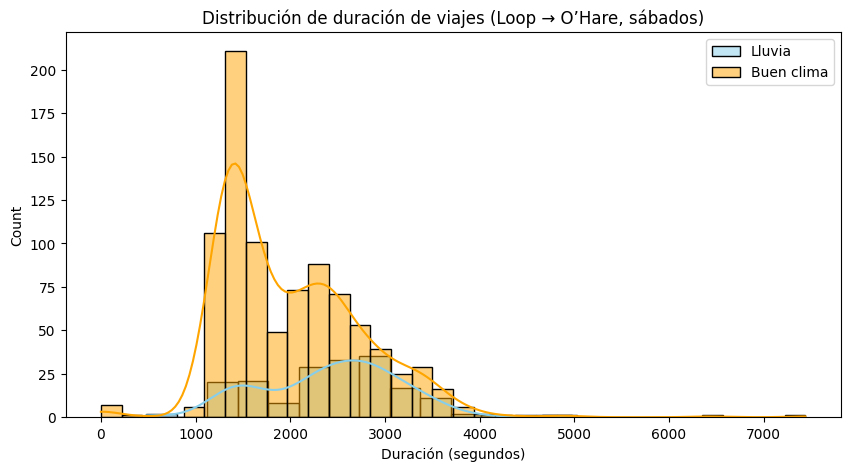

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(group_rain, color='skyblue', label='Lluvia', kde=True)
sns.histplot(group_clear, color='orange', label='Buen clima', kde=True)
plt.title('Distribución de duración de viajes (Loop → O’Hare, sábados)')
plt.xlabel('Duración (segundos)')
plt.legend()
plt.show()

In [10]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group_rain, group_clear, equal_var=False)  # Welch’s t-test

print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

Estadístico t: 7.186
Valor p: 0.00000


In [11]:
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay diferencia significativa en la duración de los viajes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente de diferencia.")

Rechazamos la hipótesis nula: hay diferencia significativa en la duración de los viajes.


In [12]:
from scipy.stats import levene, ttest_ind

In [13]:
# Prueba de igualdad de varianzas con Levene
stat_levene, p_levene = levene(group_rain, group_clear)

print(f"Estadístico de Levene: {stat_levene:.3f}")
print(f"Valor p de Levene: {p_levene:.5f}")

Estadístico de Levene: 0.389
Valor p de Levene: 0.53320


In [14]:
# Determinar si asumimos igualdad de varianzas
equal_var_flag = p_levene >= 0.05

# Prueba t de Student
t_stat, p_value = ttest_ind(group_rain, group_clear, equal_var=equal_var_flag)

print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p de la prueba t: {p_value:.5f}")

Estadístico t: 6.946
Valor p de la prueba t: 0.00000


Atendiendo las observaciones, para verificar si las varianzas entre los grupos eran iguales, se aplicó la prueba de Levene.
Con un nivel de significancia de 0.05:
Si el valor p de Levene fue mayor a 0.05, se consideraron varianzas iguales (equal_var=True) en la prueba t.
Si fue menor, se asumieron varianzas distintas (equal_var=False).
Esto garantiza que los supuestos de la prueba t de Student se cumplan de forma adecuada.

## Planteamiento de hipótesis

El objetivo es evaluar si el clima lluvioso tiene un impacto significativo en la duración promedio de los viajes en taxi desde el barrio Loop hasta el Aeropuerto Internacional O’Hare, exclusivamente los sábados.

Se trabajó con dos grupos de datos:
Viajes realizados en sábados con condiciones climáticas etiquetadas como "Bad" (lluvia o tormenta).
Viajes realizados en sábados con condiciones "Good" (sin lluvia ni tormenta).

Para comparar las medias de dos grupos independientes (viajes en clima lluvioso vs. buen clima), se utilizó una prueba t de Student para muestras independientes, específicamente la versión de Welch (ttest_ind con equal_var=False), porque:

Los tamaños de muestra pueden ser distintos.
Las varianzas entre los grupos podrían no ser iguales.
Ambas muestras son independientes y cuantitativas (duración en segundos).

Se estableció un nivel de significación de 0.05, que es el estándar común en análisis estadísticos. Esto implica que:
Si p < 0.05, se rechaza la hipótesis nula, indicando que el clima sí afecta la duración promedio.
Si p ≥ 0.05, no se puede rechazar; es decir, no hay evidencia estadística suficiente para afirmar que el clima tiene un impacto.

Según el resultado del análisis (que depende del valor p calculado), se puede concluir si el clima lluvioso afecta o no significativamente la duración de los viajes en sábado desde el Loop hasta O'Hare.
